In [6]:
import ROOT
import os, sys
import numpy as np
from array import array
from plugins.CMS_lumi import CMS_lumi

In [7]:
fMC = {
    "2016_preVFP": "./miniTree/2016_preVFP/miniTree_ZGToLLG_2016_preVFP.root",
    "2016_postVFP": "./miniTree/2016_postVFP/miniTree_ZGToLLG_2016_postVFP.root",
    "2017": "./miniTree/2017/miniTree_ZGToLLG_2017.root",
    "2018": "./miniTree/2018/miniTree_ZGToLLG_2018.root"
}

tree_MC = ROOT.TChain("outTree")
for f in list(fMC.values()):
    tree_MC.Add(f)
    
print(tree_MC)

Name: outTree Title: 


In [15]:
# MC efficiency calculation
hpass_MC = ROOT.TH2D("hpass_MC", "", 3, array("d", [0, 1.4442, 1.566, 2.5]), 4, array("d", [15., 25., 35., 65., 150.]))
htotal_MC = ROOT.TH2D("htotal_MC", "", 3, array("d", [0, 1.4442, 1.566, 2.5]), 4, array("d", [15., 25., 35., 65., 150.]))

for ev in tree_MC:
    if (ev.convVtxRadius_lep1 > 16 and ev.isHggPho_lep1 != 1):
        continue
    
    htotal_MC.Fill(abs(ev.phoSCEta_lep1), ev.phoCalibEt_lep1, ev.wei1)
    if (ev.eleClass_lep1 == 0):
        hpass_MC.Fill(abs(ev.phoSCEta_lep1), ev.phoCalibEt_lep1, ev.wei1)
        
eff_MC = ROOT.TEfficiency(hpass_MC, htotal_MC)
eff_MC.SetStatisticOption(ROOT.TEfficiency.kBUniform)
eff_MC.SetConfidenceLevel(0.683)
eff_MC.SetPosteriorMode(1)

Warning in <TROOT::Append>: Replacing existing TH1: hpass_MC (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: htotal_MC (Potential memory leak).
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


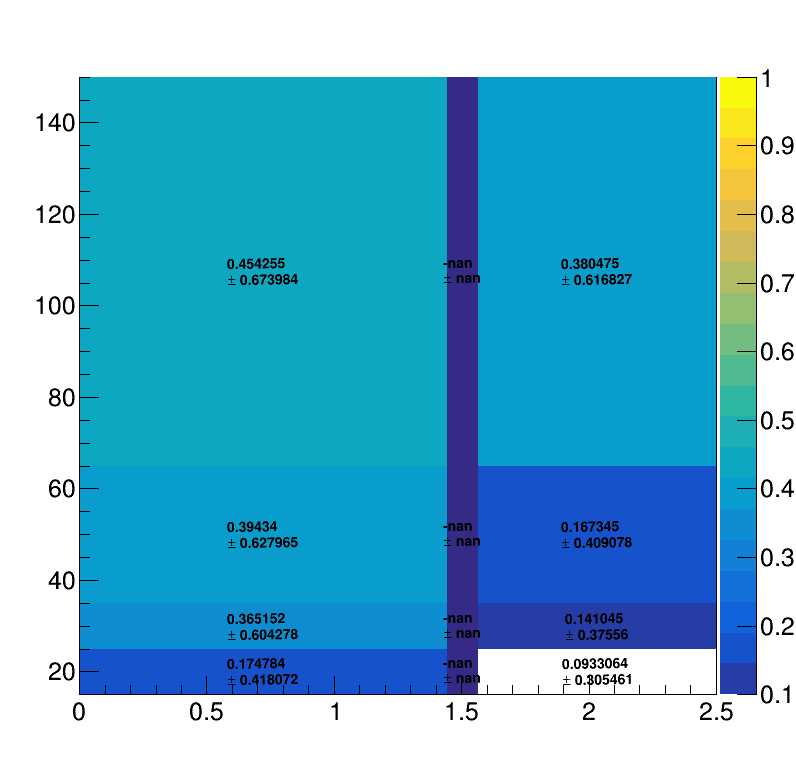

In [16]:
c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

eff_MC.Draw("COLZ texte")
c1.Update()
efferr = eff_MC.GetPaintedHistogram()
efferr.GetZaxis().SetRangeUser(0.1, 1)
c1.Draw()